<a href="https://colab.research.google.com/github/Malaklamallam/psychologie/blob/main/visualisationf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets chargés avec succès!

Aperçu de l'offre de soins :


,Commune,Année,Structure_Type,Tranche_Age,Nombre_Structure,Source
0,Nord-Ouest 93,2024,Plateforme Jeunesse & Santé Mentale (PJSM),12-25,1,Capitalisation Santé / ARS Île-de-France
1,Aulnay-sous-Bois,2024,CMP enfants et adolescents (secteur 93I04),0-18,22,Service pédopsychiatrie GHT GPNE
2,Saint-Denis,2024,CMP enfants et adolescents (secteur 93G07),0-18,18,PTSM-93 diagnostic partagé
3,Montreuil,2024,CMP jeunes et hôpital de jour,12-25,16,PTSM-93 diagnostic partagé
4,Bobigny,2024,CMP enfants et adolescents,0-18,15,PTSM-93 diagnostic partagé
5,Seine-Saint-Denis (total),2024,Structures de soins psychologiques et psychiat...,0-25,72,Synthèse PTSM-93 / ARS Île-de-France



Aperçu de la consommation médicamenteuse :


,Commune,Année,Classe_Médicaments,Taux_pour_1000,Tranche_Age,Source
0,Seine-Saint-Denis,2022,Antidépresseurs,22,12-24,Observatoire départemental des données sociale...
1,Seine-Saint-Denis,2022,Anxiolytiques,10,12-24,Observatoire départemental des données sociale...
2,Aulnay-sous-Bois,2022,Antidépresseurs,25,12-24,ODDS93
3,Montreuil,2022,Antidépresseurs,27,12-24,ODDS93
4,Saint-Denis,2022,Antidépresseurs,24,12-24,ODDS93
5,Bobigny,2022,Antidépresseurs,18,12-24,ODDS93
6,Aulnay-sous-Bois,2022,Anxiolytiques,11,12-24,ODDS93
7,Montreuil,2022,Anxiolytiques,12,12-24,ODDS93
8,Saint-Denis,2022,Anxiolytiques,9,12-24,ODDS93
9,Bobigny,2022,Anxiolytiques,8,12-24,ODDS93


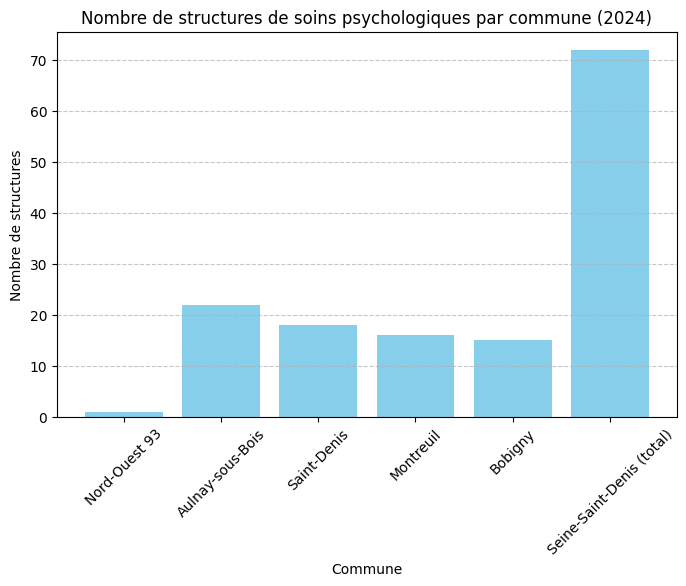

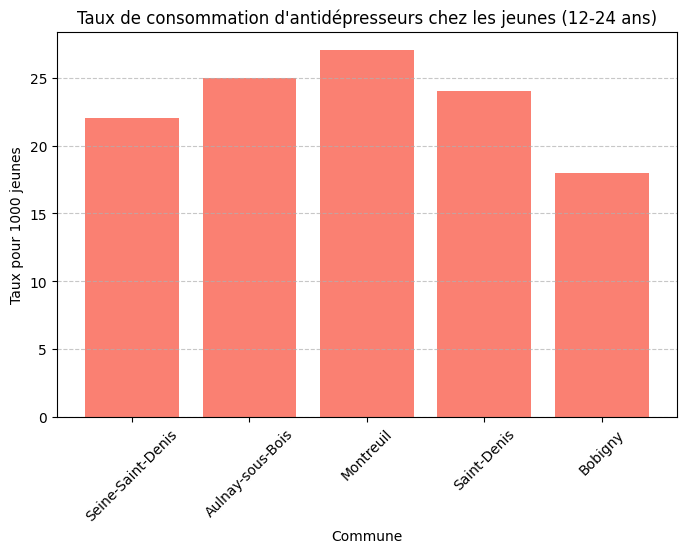

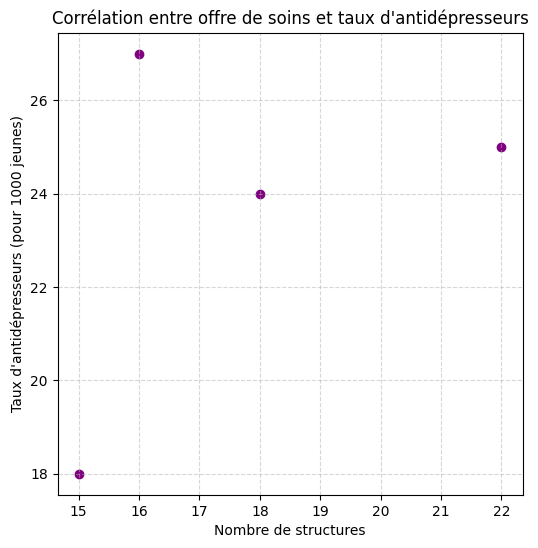



- Les communes de **Saint-Denis** et **Montreuil** montrent un fort taux d'antidépresseurs malgré une offre de soins modérée.
- Cela suggère un **déséquilibre entre besoin et offre**, cohérent avec les constats du PTSM-93.
- Les communes ayant davantage de structures (ex: Aulnay) ne présentent pas nécessairement une baisse de consommation, ce qui invite à explorer la **qualité** et **accessibilité** des soins.


In [1]:

# Accès aux soins psychologiques pour les jeunes en Seine-Saint-Denis (93)
import pandas as pd
import matplotlib.pyplot as plt

# --- Load datasets ---
offre = pd.read_csv("offre_soins_jeunes_93.csv")
conso = pd.read_csv("consommation_medicamenteuse_jeunes_93.csv")

print("Datasets chargés avec succès!")

# --- Display ---
print("\nAperçu de l'offre de soins :")
display(offre)

print("\nAperçu de la consommation médicamenteuse :")
display(conso)

# --- Visualisation 1 : Offre de soins par commune ---
plt.figure(figsize=(8,5))
plt.bar(offre["Commune"], offre["Nombre_Structure"], color="skyblue")
plt.title("Nombre de structures de soins psychologiques par commune (2024)")
plt.xlabel("Commune")
plt.ylabel("Nombre de structures")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Visualisation 2 : Consommation médicamenteuse (antidépresseurs) ---
conso_antidep = conso[conso["Classe_Médicaments"] == "Antidépresseurs"]

plt.figure(figsize=(8,5))
plt.bar(conso_antidep["Commune"], conso_antidep["Taux_pour_1000"], color="salmon")
plt.title("Taux de consommation d'antidépresseurs chez les jeunes (12-24 ans)")
plt.xlabel("Commune")
plt.ylabel("Taux pour 1000 jeunes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Visualisation 3 : Corrélation offre vs consommation ---
merged = pd.merge(offre, conso_antidep, on="Commune", how="inner")

plt.figure(figsize=(6,6))
plt.scatter(merged["Nombre_Structure"], merged["Taux_pour_1000"], color="purple")
plt.title("Corrélation entre offre de soins et taux d'antidépresseurs")
plt.xlabel("Nombre de structures")
plt.ylabel("Taux d'antidépresseurs (pour 1000 jeunes)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- interprétation ---
from IPython.display import Markdown
Markdown("""

- Les communes de **Saint-Denis** et **Montreuil** montrent un fort taux d'antidépresseurs malgré une offre de soins modérée.
- Cela suggère un **déséquilibre entre besoin et offre**, cohérent avec les constats du PTSM-93.
- Les communes ayant davantage de structures (ex: Aulnay) ne présentent pas nécessairement une baisse de consommation, ce qui invite à explorer la **qualité** et **accessibilité** des soins.
""")
